In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import glob

import h5py
import flammkuchen as fl
import seaborn as sns
from matplotlib.cm import ScalarMappable
import scipy
from scipy import stats
import matplotlib.gridspec as gridspec

In [3]:
from megabouts_helper import labels_cat, color, color_bouts, cmp_bouts, color_ipsi_cont
from preprocess_helper import assign_leading_fin
from preprocess_helper import reshape_feature_array

In [8]:
def sort_ipsi_contra_arrays(array1, array2, ipsi_indicator):
    # Determine ipsilateral and contralateral
    """
    ipsi_fin = 0, left fin is ipsi, 
    ipsi_fin = 1, right fin is ipsi_fin,
    """
    ipsi_fin = np.full(array1.shape[0], np.nan)
    contra_fin = np.full(array2.shape[0], np.nan)

    for i, dir_value in enumerate(ipsi_indicator):
        if dir_value == 0:  # Left 
            ipsi_fin[i] = array1[i]
            contra_fin[i] = array2[i]
        elif dir_value == 1:  # Right
            ipsi_fin[i] = array2[i]
            contra_fin[i] = array1[i]
    return ipsi_fin, contra_fin

### Load data

In [9]:
save_figure_path = Path(r'\\portulab.synology.me\data\Kata\Figures_Paper\Figure_2\fig_2')

In [10]:
master_path = Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data')

path_tensors = Path(master_path/ 'tensors' /'tensor_ipsi_contra_pos.h5')
# path_features = Path(master_path/ 'features_bouts_new.csv')
path_features = Path(master_path/ 'features_ipsi_contra.csv')
master_path, path_features

(WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data'),
 WindowsPath('//portulab.synology.me/data/Kata/Processed_Data/tensor_data/features_ipsi_contra.csv'))

In [11]:
features = pd.read_csv(path_features)
features.head()

,Unnamed: 0.1,Unnamed: 0,exp,fish_id,bout_angle,cluster,frame_start,frame_end,bout_id_orig,mb_proba,...,ipsi_peak_vigor,contra_peak_vigor,ipsi_freqs,contra_freqs,ipsi_osc,contra_osc,ipsi_duration,contra_duration,ipsi_max_freqs,contra_max_freqs
0,0,0,13052024_visstim_2D_round,240513_f0,3.000171,0,18375,18410,78,0.806645,...,0.244681,0.164076,0.109756,0.105263,4,3,28.0,27.0,0.166667,0.166667
1,1,1,13052024_visstim_2D_round,240513_f0,1.649302,0,19461,19484,80,1.000000,...,0.163745,0.128555,0.119048,0.117647,2,2,19.0,15.0,0.250000,0.166667
2,2,2,13052024_visstim_2D_round,240513_f0,-0.861132,0,19661,19689,81,1.000000,...,0.219439,0.184779,0.104167,0.115385,3,2,27.0,16.0,0.125000,0.166667
3,3,3,13052024_visstim_2D_round,240513_f0,0.870591,0,20257,20292,84,1.000000,...,0.209418,0.198009,0.117647,0.117647,4,2,35.0,16.0,0.125000,0.166667
4,4,4,13052024_visstim_2D_round,240513_f0,2.231631,0,20824,20859,86,1.000000,...,0.220615,0.185247,0.103448,0.116667,3,3,22.0,23.0,0.125000,0.125000


In [12]:
clusters = features.cluster

In [13]:
### tail, fin 1, fin 2
traces =  fl.load(path_tensors)
traces.shape

(11063, 3, 50)

In [14]:
t_feature_vector_array = fl.load(master_path/ 'peaks_valleys'/  't_feature_vector_array.h5')
l_feature_vector_array = fl.load(master_path/ 'peaks_valleys'/  'l_feature_vector_array.h5')
r_feature_vector_array = fl.load(master_path/ 'peaks_valleys'/  'r_feature_vector_array.h5')

laterality = fl.load(master_path/ 'features'/'bout_laterality.h5')

In [15]:
max_n=9
reshaped_array, peaks_a_array, peaks_i_array, valleys_a_array, valleys_i_array = reshape_feature_array(t_feature_vector_array)
l_reshaped_array, l_peaks_a_array, l_peaks_i_array, l_valleys_a_array, l_valleys_i_array = reshape_feature_array(l_feature_vector_array)
r_reshaped_array, r_peaks_a_array, r_peaks_i_array, r_valleys_a_array, r_valleys_i_array = reshape_feature_array(r_feature_vector_array)

Reshaped array shape: (11063, 4, 9)
Reshaped array shape: (11063, 4, 9)
Reshaped array shape: (11063, 4, 9)


In [16]:
leading_fin = features.leading_fin.values
ipsi_fin = features.ipsi_fin.values

In [17]:
ipsi_amp = features.ipsi_amp_0
contra_amp = features.contra_amp_0

In [18]:
ipsi_peaks_a_array_0, contra_peaks_a_array_0 = sort_ipsi_contra_arrays(l_peaks_a_array[:,0], r_peaks_a_array[:,0], ipsi_fin)
ipsi_peaks_a_array_1, contra_peaks_a_array_1 = sort_ipsi_contra_arrays(l_peaks_a_array[:,1], r_peaks_a_array[:,1], ipsi_fin)
ipsi_peaks_a_array_2, contra_peaks_a_array_2 = sort_ipsi_contra_arrays(l_peaks_a_array[:,2], r_peaks_a_array[:,2], ipsi_fin)
ipsi_peaks_a_array_3, contra_peaks_a_array_3 = sort_ipsi_contra_arrays(l_peaks_a_array[:,3], r_peaks_a_array[:,3], ipsi_fin)

In [19]:
data_ipsis = np.stack([ipsi_peaks_a_array_0, ipsi_peaks_a_array_1, ipsi_peaks_a_array_2, ipsi_peaks_a_array_3]).T
data_contras = np.stack([contra_peaks_a_array_0, contra_peaks_a_array_1, contra_peaks_a_array_2, contra_peaks_a_array_3]).T

data_ipsis.shape

(11063, 4)

## Load data

In [20]:
tbf_output = fl.load(master_path / 'tbf_fbf'/ 'tbf_output.h5')

In [21]:
ipsi_mask = features['ipsi_fin'].values.astype(int)
contra_mask = np.where((ipsi_mask==0)|(ipsi_mask==1), ipsi_mask^1, ipsi_mask)

In [22]:
dt = 0.25/traces.shape[2]
dt

0.005

In [23]:
fwd = [0,1,2,3]
trn = [4,5,6]

# Create masks for each cluster
fwd_mask = np.isin(clusters, fwd)
trn_mask = np.isin(clusters, trn)

# Display the results
print("FWD Mask:", fwd_mask)
print("TRN Mask:", trn_mask)

masks = [fwd_mask, trn_mask]

FWD Mask: [ True  True  True ... False  True  True]
TRN Mask: [False False False ...  True False False]


In [30]:
alph = 0.15
cycles=3
width = 0.35  # Width of the ba
lw=0.5
cm = 1/2.54  # centimeters in inches
f_size = 6
dpi=600

# Adjust the error bar line width using error_kw
error_kw = {'elinewidth': lw, 'capsize': 3}  # Adjust elinewidth as desired



## Panel H-G

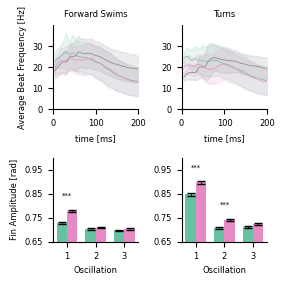

In [33]:
fig = plt.figure(figsize=(7.5*cm, 7.5*cm))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])  # 4 rows, third row is twice as high

ax1 = plt.subplot(gs[0, 0])  # first row, first column
ax2 = plt.subplot(gs[0, 1])  # first row, second column
ax3 = plt.subplot(gs[1, 0])  # second row, first column
ax4 = plt.subplot(gs[1, 1])  # second row, second column

tbf_sample = tbf_output[:,masks[0], :]
i_mask = ipsi_mask[masks[0]]
c_mask = contra_mask[masks[0]]
tps = np.arange(tbf_sample.shape[2])*dt*1000  # Multiply by 1000 to convert to ms
for i, (fin, title, col) in enumerate(zip(range(1), ['Tail'], ['gray'])):
    tbf_mean = np.nanmean(tbf_sample[fin], 0)
    tbf_std = np.nanstd(tbf_sample[fin], 0)
    ax1.plot(tps, tbf_mean, c=col, lw=lw)
    ax1.fill_between(tps, tbf_mean-tbf_std, tbf_mean+tbf_std, color=col, alpha=alph)

for i, (mask, fin, col) in enumerate(zip([i_mask, c_mask], ['Ipsilateral fin', 'Contralateral fin'], color_ipsi_cont[:2])):
    fin_subset = tbf_sample[1:][mask, np.arange(mask.shape[0]), :]
    tbf_mean = np.nanmean(fin_subset, 0)
    tbf_std = np.nanstd(fin_subset, 0)
    ax1.plot(tps, tbf_mean, c=col, label=fin, lw=lw)
    ax1.fill_between(tps, tbf_mean-tbf_std, tbf_mean+tbf_std, color=col, alpha=alph)

tbf_sample = tbf_output[:,masks[1], :]
i_mask = ipsi_mask[masks[1]]
c_mask = contra_mask[masks[1]]
tps = np.arange(tbf_sample.shape[2])*dt*1000  # Multiply by 1000 to convert to ms
for i, (fin, title, col) in enumerate(zip(range(1), ['Tail'], ['gray'])):
    tbf_mean = np.nanmean(tbf_sample[fin], 0)
    tbf_std = np.nanstd(tbf_sample[fin], 0)
    ax2.plot(tps, tbf_mean, c=col, lw=lw)
    ax2.fill_between(tps, tbf_mean-tbf_std, tbf_mean+tbf_std, color=col, alpha=alph)

for i, (mask, fin, col) in enumerate(zip([i_mask, c_mask], ['Ipsilateral fin', 'Contralateral fin'], color_ipsi_cont[:2])):
    fin_subset = tbf_sample[1:][mask, np.arange(mask.shape[0]), :]
    tbf_mean = np.nanmean(fin_subset, 0)
    tbf_std = np.nanstd(fin_subset, 0)
    ax2.plot(tps, tbf_mean, c=col, label=fin, lw=lw)
    ax2.fill_between(tps, tbf_mean-tbf_std, tbf_mean+tbf_std, color=col, alpha=alph)

### axes labels
for ax in [ax1, ax2]:
    ax.tick_params(axis='x', labelsize=f_size)  # Adjust 10 to your desired fontsize
    ax.tick_params(axis='y', labelsize=f_size)  # Adjust 10 to your desired fontsize
    ax.set_xlabel('time [ms]', fontsize=f_size)  # Change label to ms
    ax.set_xlim(0,200)
    ax.set_xticks(np.arange(0,201,100))
    ax.set_xticklabels(np.arange(0,201,100), fontsize=f_size)
    ax.set_yticks(np.arange(0,40,10))
    ax.set_yticklabels(np.arange(0,40,10), fontsize=f_size)
    ax.set_ylim(0,40)
    
ax1.set_ylabel('Average Beat Frequency [Hz]', fontsize=f_size)


data_ipsi = data_ipsis[masks[0]][:, :cycles]
data_contra = data_contras[masks[0]][:, :cycles]
# Compute means and standard errors
mean_ipsi = np.nanmean(data_ipsi, axis=0)
stderr_ipsi = np.nanstd(data_ipsi, axis=0) / np.sqrt(data_ipsi.shape[0])
mean_contra = np.nanmean(data_contra, axis=0)
stderr_contra = np.nanstd(data_contra, axis=0) / np.sqrt(data_contra.shape[0])
x = np.arange(cycles)
# Plot ipsilateral data with SEM error bars
ax3.bar(x - width/2, mean_ipsi, width, yerr=stderr_ipsi, label='Ipsi', color=color_ipsi_cont[0], error_kw=error_kw)
# Plot contralateral data with SEM error bars
ax3.bar(x + width/2, mean_contra, width, yerr=stderr_contra, label='Contra', color=color_ipsi_cont[1], error_kw=error_kw)
# Compute and annotate statistics (paired t-test)
t_values, p_values = stats.ttest_rel(data_ipsi, data_contra, axis=0, nan_policy='omit')
for j, (t, p) in enumerate(zip(t_values, p_values)):
    max_y = max(mean_ipsi[j] + stderr_ipsi[j], mean_contra[j] + stderr_contra[j])
    if p < 0.001:
        ax3.text(j, max_y + 0.05, '***', fontsize=f_size*0.8, ha='center', color='black')
    elif p < 0.01:
        ax3.text(j, max_y + 0.05, '**', fontsize=f_size*0.8, ha='center', color='black')
    elif p < 0.05:
        ax3.text(j, max_y + 0.05, '*', fontsize=f_size*0.8, ha='center', color='black')

data_ipsi = data_ipsis[masks[1]][:, :cycles]
data_contra = data_contras[masks[1]][:, :cycles]
# Compute means and standard errors
mean_ipsi = np.nanmean(data_ipsi, axis=0)
stderr_ipsi = np.nanstd(data_ipsi, axis=0) / np.sqrt(data_ipsi.shape[0])
mean_contra = np.nanmean(data_contra, axis=0)
stderr_contra = np.nanstd(data_contra, axis=0) / np.sqrt(data_contra.shape[0])
x = np.arange(cycles)
# Plot ipsilateral data with SEM error bars
ax4.bar(x - width/2, mean_ipsi, width, yerr=stderr_ipsi, label='Ipsi', color=color_ipsi_cont[0], error_kw=error_kw)
# Plot contralateral data with SEM error bars
ax4.bar(x + width/2, mean_contra, width, yerr=stderr_contra, label='Contra', color=color_ipsi_cont[1],  error_kw=error_kw)
# Compute and annotate statistics (paired t-test)
t_values, p_values = stats.ttest_rel(data_ipsi, data_contra, axis=0, nan_policy='omit')
for j, (t, p) in enumerate(zip(t_values, p_values)):
    max_y = max(mean_ipsi[j] + stderr_ipsi[j], mean_contra[j] + stderr_contra[j])
    if p < 0.001:
        ax4.text(j, max_y + 0.05, '***', fontsize=f_size*0.8, ha='center', color='black')
    elif p < 0.01:
        ax4.text(j, max_y + 0.05, '**', fontsize=f_size*0.8, ha='center', color='black')
    elif p < 0.05:
        ax4.text(j, max_y + 0.05, '*', fontsize=f_size*0.8, ha='center', color='black')

ax3.set_ylabel('Fin Amplitude [rad]', fontsize=f_size)

for ax in [ax3, ax4]:
    ax.set_xticks(x)
    ax.set_xticklabels(np.arange(1, cycles + 1), fontsize=f_size)
    ax.set_xlabel('Oscillation', fontsize=f_size)
    ax.set_yticks(np.arange(0.65, 1.01, 0.1))
    ax.set_yticklabels(np.round(np.arange(0.65, 1.01, 0.1),2), fontsize=f_size)
    ax.set_ylim(0.65,1)

for ax in [ax1, ax2, ax3, ax4]:
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')

    ax.xaxis.label.set_color('black')
    ax.yaxis.label.set_color('black')
    ax.title.set_color('black')

    ax.tick_params(axis='x', colors='black')
    ax.tick_params(axis='y', colors='black')

ax1.set_title('Forward Swims', fontsize=f_size)
ax2.set_title('Turns', fontsize=f_size)

sns.despine(top=True, right=True, left=False, bottom=False, offset=None, trim=False)
plt.tight_layout()

if save_figure_path is not None:
    fig.savefig(save_figure_path / 'fins_comp_panel_3.png', dpi=dpi)
    fig.savefig(save_figure_path / 'fins_comp_panel_3.pdf', dpi=dpi)